In [1]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, ConstantKernel as C
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def prepare_data_uniform0to1(n_sample = 200, n_objective = 2, n_parameter = 17, train_ratio = 0.8, randseed=123456789):
    # n_sample = 2000
    # n_objective = 2
    # n_parameter = 17
    # train_ratio = 0.8

    np.random.seed(randseed)
    
    # Assuming x, y are your input and output datasets
    y = np.random.uniform(size=[n_sample, n_objective]) # uniform samples 0-1
    x = np.random.uniform(size=[n_sample, n_parameter])
    
    # 20% for test, 80% for train
    index_train = np.random.choice(np.arange(x.shape[0]), size=int(train_ratio * x.shape[0]), replace=False)
    index_test = np.setdiff1d(np.arange(x.shape[0]), index_train)

    return x[index_train, :], y[index_train,:], x[index_test, :], y[index_test,:]

def plot_results_first2objectives(y_train, y_train_pred, y_test, y_test_pred):
    # plot results
    fig = plt.figure(figsize=[5, 2.5])
    for i in range(2):
        fig.add_subplot(1,2,i+1)
        plt.scatter(y_train, y_train_pred, label='train')
        plt.scatter(y_test, y_test_pred, label='test')
        plt.xlabel('input')
        plt.ylabel('prediction')
        plt.legend()
    plt.tight_layout()
    plt.show()


/glade/u/apps/opt/conda/envs/npl-2024a/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 2 of parameter k2__length_scale is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


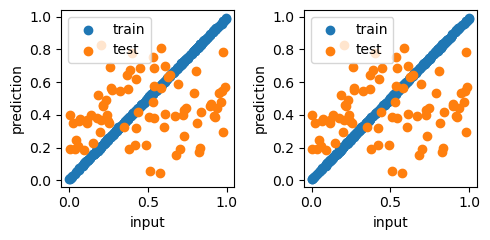

In [7]:
# gpr 1
def gpr_1(x_train, y_train, x_test, y_test):
    # Define the kernel with Matern
    kernel = C(1.0, (1e-3, 1e3)) * Matern(length_scale=np.ones(x_train.shape[1]),  length_scale_bounds=(1e-3, 1e3), nu=2.5)
    
    sm_skgpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=0, alpha=1e-3, normalize_y=False)
    sm_skgpr.fit(x_train, y_train)
    
    y_train_pred = sm_skgpr.predict(x_train)
    y_test_pred = sm_skgpr.predict(x_test)

    return y_train_pred, y_test_pred

x_train, y_train, x_test, y_test = prepare_data_uniform0to1()
y_train_pred, y_test_pred = gpr_1(x_train, y_train, x_test, y_test)
plot_results_first2objectives(y_train, y_train_pred, y_test, y_test_pred)

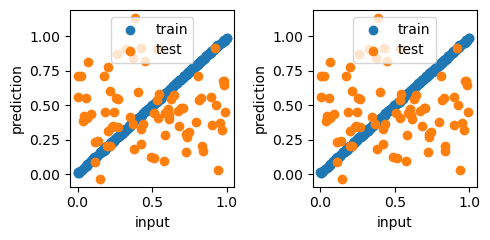

In [9]:
# gpr 2
def gpr_2(x_train, y_train, x_test, y_test):

    from sklearn.gaussian_process.kernels import RBF
    kernel = RBF(length_scale=1.0, length_scale_bounds=(1e-3, 1e3))
    
    sm_skgpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=0, alpha=1e-3, normalize_y=False)
    sm_skgpr.fit(x_train, y_train)
    
    y_train_pred = sm_skgpr.predict(x_train)
    y_test_pred = sm_skgpr.predict(x_test)

    return y_train_pred, y_test_pred

x_train, y_train, x_test, y_test = prepare_data_uniform0to1()
y_train_pred, y_test_pred = gpr_2(x_train, y_train, x_test, y_test)
plot_results_first2objectives(y_train, y_train_pred, y_test, y_test_pred)

/glade/u/apps/opt/conda/envs/npl-2024a/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter alpha is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


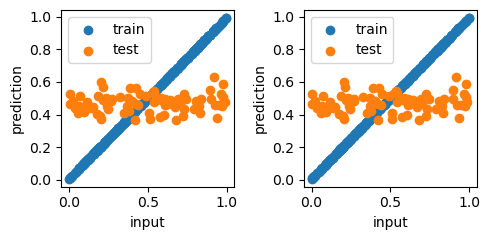

In [10]:
# gpr 3
def gpr_3(x_train, y_train, x_test, y_test):

    from sklearn.gaussian_process.kernels import RationalQuadratic
    kernel = RationalQuadratic(length_scale=1.0, alpha=0.1, length_scale_bounds=(1e-3, 1e3), alpha_bounds=(1e-2, 1e2))

    sm_skgpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=0, alpha=1e-3, normalize_y=False)
    sm_skgpr.fit(x_train, y_train)
    
    y_train_pred = sm_skgpr.predict(x_train)
    y_test_pred = sm_skgpr.predict(x_test)

    return y_train_pred, y_test_pred

x_train, y_train, x_test, y_test = prepare_data_uniform0to1()
y_train_pred, y_test_pred = gpr_3(x_train, y_train, x_test, y_test)
plot_results_first2objectives(y_train, y_train_pred, y_test, y_test_pred)

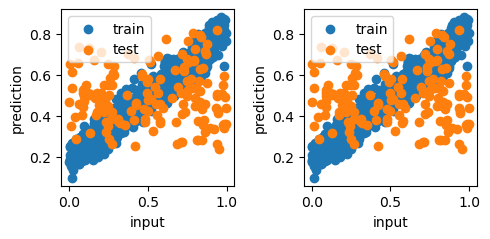

In [17]:
# random forest
def randomforest(x_train, y_train, x_test, y_test):

    from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

    sm_rf = RandomForestRegressor()
    sm_rf.fit(x_train, y_train)
    
    # check surrogate model results
    
    y_train_pred = sm_rf.predict(x_train)
    y_test_pred = sm_rf.predict(x_test)

    return y_train_pred, y_test_pred

x_train, y_train, x_test, y_test = prepare_data_uniform0to1(n_sample = 400, n_objective = 2, n_parameter = 2)
y_train_pred, y_test_pred = randomforest(x_train, y_train, x_test, y_test)
plot_results_first2objectives(y_train, y_train_pred, y_test, y_test_pred)